In [23]:
!pip install -U fortran-magic

In [24]:
%matplotlib inline
%load_ext fortranmagic
from io import BytesIO
import os
from urllib.parse import urlencode

import requests


import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [9]:
assert ran_the_first_cell, "Oh noes!"

In [10]:
# My Example
assert ran_the_first_cell, "oh que bien juegas!"

In [11]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [12]:
# My Example
l_1 = ['uno', 2, 'tres', 'cuatro', 'cinco', 6, 'seis']
l_1

['uno', 2, 'tres', 'cuatro', 'cinco', 6, 'seis']

In [13]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [14]:
# My Example
# Lists can be indexed like C-style arrays.
first = l_1[0]
second = l_1[1]
print("first:", first)
print("second:", second)

first: uno
second: 2


In [15]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [16]:
# My Example
# Negative indexing gives elements relative to the end of the list.
last = l_1[-1]
penultimate = l_1[-2]
print("last:", last)
print("second to last:", penultimate)

last: seis
second to last: 6


In [18]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [19]:
# My Example
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l_1[1:3]
sublist

[2, 'tres']

In [20]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [21]:
# My Example
# l[:N] is equivalent to l[0:N].
first_three = l_1[:3]
first_three

['uno', 2, 'tres']

In [22]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [23]:
# My Example
# l[3:] is equivalent to l[3:len(l)].
after_three = l_1[3:]
after_three

['cuatro', 'cinco', 6, 'seis']

In [24]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [27]:

# There's also a third parameter, "step", which gets every Nth element.
l_1 = ['a', 'b', 'x', 'y', 'q', 'k', 'r','z']
l_1[1:7:2]

['b', 'y', 'k']

In [28]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [29]:
# My Example
# This is a cute way to reverse a list.
l_1[::-1]

['z', 'r', 'k', 'q', 'y', 'x', 'b', 'a']

In [30]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [31]:
import sys
sys.float_info.max

1.7976931348623157e+308

In [33]:
# My Example
# Lists can be grown efficiently (in O(1) amortized time).
l_1 = [15, 30, 60, 80, 100]
print("Before:", l_1)
l_1.append('seven')
print("After:", l_1)

Before: [15, 30, 60, 80, 100]
After: [15, 30, 60, 80, 100, 'seven']


In [34]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [35]:
# My Example
# Comprehensions let us perform elementwise computations.
l_1 = [10, 20, 30, 40, 50]
[x / 2 for x in l_1]

[5.0, 10.0, 15.0, 20.0, 25.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [36]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [38]:
# My Example
# Dictionaries are key-value mappings.
philosophers_1 = {'juan': 1, 'maria': 2, 'sofia': 3}
philosophers_1

{'juan': 1, 'maria': 2, 'sofia': 3}

In [39]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [41]:
# My Example
# Like lists, dictionaries are size-mutable.
philosophers_1['valery'] = 4
philosophers_1

{'Ludwig': 4, 'juan': 1, 'maria': 2, 'sofia': 3, 'valery': 4}

In [42]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [47]:
# My Example
del philosophers_1['maria']
philosophers_1

{'Ludwig': 4, 'juan': 1, 'sofia': 3}

In [51]:
# No slicing.
philosophers['Bertrand':'kant']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [52]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [53]:

# Suppose we have some matrices...
a_1 = [[51, 24, 12],
     [9, 5, 6],
     [50, 8, 19],
     [6, 1, 14]]

b_1 = [[4, 2, 6, 5],
     [9, 3, 9, 7]]

In [55]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [56]:
%%time

matmul(a, b)

CPU times: user 55 µs, sys: 0 ns, total: 55 µs
Wall time: 63.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [57]:

%%time

matmul(a_1, b_1)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.4 µs


[[420, 174, 522, 423],
 [81, 33, 99, 80],
 [272, 124, 372, 306],
 [33, 15, 45, 37]]

In [58]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
print(randm)
# My Example
randm_1 = random_matrix(20, 30)
print(randm_1)

[[0.14510759690426578, 0.48745647780167856, 0.4771284513156744], [0.2850058317650991, 0.23349183589434663, 0.8359483199340492]]
[[0.0739104671712566, 0.18247379355499127, 0.25422922447191754, 0.08964623840671082, 0.8490417596351195, 0.07201675126760065, 0.34910178322545304, 0.618797307373604, 0.5850838592056972, 0.44322929335285743, 0.46468375394761774, 0.5966042266441046, 0.2649534348311776, 0.6734796177995948, 0.7684916453698705, 0.2521479667575067, 0.6027442076217653, 0.6864958170605622, 0.7374834410703902, 0.9104192084309263, 0.14275780073305522, 0.44327747496513903, 0.17306363733875185, 0.8493908107433221, 0.06872451826625825, 0.4932310176520458, 0.8441818618838237, 0.8511971277560683, 0.47853873171612793, 0.19286912011102353], [0.6792607844764006, 0.3696625859982704, 0.9782947229717649, 0.031309261540008015, 0.9311158607511879, 0.7269884933052901, 0.25037942286698966, 0.027528396940349253, 0.8918249397881167, 0.646194985451074, 0.550734960442666, 0.41650943497337334, 0.0816718587

In [59]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9 s, sys: 27 ms, total: 9.03 s
Wall time: 9.06 s


In [60]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [61]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [62]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [63]:

list_data_1 = [float(2 * i) for i in range(90000)]
array_data_1 = np.array(list_data_1)

In [64]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.01 ms, sys: 0 ns, total: 9.01 ms
Wall time: 8.95 ms


333328333350000.0

In [65]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 239 µs, sys: 0 ns, total: 239 µs
Wall time: 249 µs


333328333350000.0

In [66]:
# My Example
%%time
python_dot_product(list_data_1, list_data_1)

CPU times: user 10.7 ms, sys: 96 µs, total: 10.8 ms
Wall time: 11.7 ms


971983800060000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


In [68]:

%%time
fortran_dot_product(array_data_1, array_data)

CPU times: user 259 µs, sys: 15 µs, total: 274 µs
Wall time: 284 µs


485991900030000.0

## Why is the Python Version so Much Slower?

In [69]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [74]:

# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([7, 5, 2, 1], [6, 7 + 0j, 5.0, 'seven'])
#[type(x) for x in _]

[42, (35+0j), 10.0, 'seven']

In [75]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [77]:

# Interpretation overhead.
source_code = 'a - b ** c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_POWER
              8 BINARY_SUBTRACT
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [78]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [80]:

#import numpy as np

data_1 = np.array([3, 5, 4, 9])
data_1

array([3, 5, 4, 9])

In [81]:
data + data

array([2, 4, 6, 8])

In [83]:

4 * data_1

array([12, 20, 16, 36])

In [84]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.04 ms, sys: 1.84 ms, total: 2.88 ms
Wall time: 5.97 ms


333328333350000.0

In [86]:

%%time
# Naive dot product
(array_data ** 2).sum()

CPU times: user 509 µs, sys: 28 µs, total: 537 µs
Wall time: 546 µs


333328333350000.0

In [87]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.73 ms, sys: 3.93 ms, total: 5.66 ms
Wall time: 8.51 ms


333328333350000.0

In [88]:

%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 390 µs, sys: 0 ns, total: 390 µs
Wall time: 229 µs


333328333350000.0

In [89]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 241 µs, sys: 0 ns, total: 241 µs
Wall time: 252 µs


333328333350000.0

In [36]:
# Numpy won't allow us to write a string into an int array.
data[0] = "fo"

# My Example
data_1[0] = "ola"

NameError: ignored

In [91]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [92]:
# My Example
# We also can't grow an array once it's created.
data_1.append(30)

AttributeError: ignored

In [93]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [97]:

# We **can** reshape an array though.
four_by_one = data_1.reshape(4, 1)
four_by_one

array([[3],
       [5],
       [4],
       [9]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [98]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [99]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int16').reshape(3, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
DType: int16
Shape: (3, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [100]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [101]:

data_1 = np.arange(21).reshape(3, 7)
data_1

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20]])

In [102]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [103]:

# Binary operators.
data_1 ** 3

array([[   0,    1,    8,   27,   64,  125,  216],
       [ 343,  512,  729, 1000, 1331, 1728, 2197],
       [2744, 3375, 4096, 4913, 5832, 6859, 8000]])

In [104]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [105]:

# Unary functions.
np.cbrt(data_1)

array([[0.        , 1.        , 1.25992105, 1.44224957, 1.58740105,
        1.70997595, 1.81712059],
       [1.91293118, 2.        , 2.08008382, 2.15443469, 2.22398009,
        2.28942849, 2.35133469],
       [2.41014226, 2.46621207, 2.5198421 , 2.57128159, 2.62074139,
        2.66840165, 2.71441762]])

In [106]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [107]:

# Comparison operations
(data_1 % 4) == 0

array([[ True, False, False, False,  True, False, False],
       [False,  True, False, False, False,  True, False],
       [False, False,  True, False, False, False,  True]])

In [108]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [109]:

# Boolean combinators.
((data_1 % 4) == 0) & ((data_1 % 5) == 0)

array([[ True, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True]])

In [110]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [111]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [121]:
import math
sines_2 = np.cos(np.linspace(0, math.pi / 2, 10))
cosines_2 = np.sin(np.linspace(0, math.pi / 2, 10))
sines_2

array([1.00000000e+00, 9.84807753e-01, 9.39692621e-01, 8.66025404e-01,
       7.66044443e-01, 6.42787610e-01, 5.00000000e-01, 3.42020143e-01,
       1.73648178e-01, 6.12323400e-17])

In [122]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [132]:

# Slicing works with the same semantics as Python lists.
sines_2[0]

1.0

In [124]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [133]:

sines_2[:3]  # First three elements  

array([1.        , 0.98480775, 0.93969262])

In [126]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [134]:

sines_2[5:]  # Elements from 5 on.

array([6.42787610e-01, 5.00000000e-01, 3.42020143e-01, 1.73648178e-01,
       6.12323400e-17])

In [128]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [135]:

sines_2[::2]  # Every other element.

array([1.        , 0.93969262, 0.76604444, 0.5       , 0.17364818])

In [130]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [136]:

# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines_2:\n", sines_2)
print("sines_2 > 0.3:\n", sines_2 > 0.3)
print("sines_2[sines_2 > 0.3]:\n", sines_2[sines_2 > 0.3])

sines_2:
 [1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
 7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
 1.73648178e-01 6.12323400e-17]
sines_2 > 0.3:
 [ True  True  True  True  True  True  True  True False False]
sines_2[sines_2 > 0.3]:
 [1.         0.98480775 0.93969262 0.8660254  0.76604444 0.64278761
 0.5        0.34202014]


In [137]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [138]:
# My Example
# We index with lists/arrays of integers to select values at those indices.
print(sines_2)
sines_2[[0, 4, 7]]

[1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
 7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
 1.73648178e-01 6.12323400e-17]


array([1.        , 0.76604444, 0.34202014])

In [141]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [139]:

# Index arrays are often used for sorting one or more arrays.
unsorted_data_1 = np.array([10, 30, 20, 120, -10, 50, 20])

In [142]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [143]:

sort_indices_1 = np.argsort(unsorted_data_1)
sort_indices_1

array([4, 0, 2, 6, 1, 5, 3])

In [144]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [146]:

unsorted_data[sort_indices_1]

array([-1,  1,  2,  2,  3,  5, 12])

In [147]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [148]:

market_caps_1 = np.array([120, 60, 100, 50, 60])  # Presumably in dollars?
assets_1 = np.array(['V', 'W', 'Y', 'X', 'Z'])

In [149]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [150]:

# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap_1 = np.argsort(market_caps_1)
assets[sort_by_mcap_1]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [151]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [152]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [153]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [154]:

data_1 = np.arange(36).reshape(6, 6)
data_1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [155]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [156]:

data_1[:3, :3]  # First three rows and first three columns.

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [12, 13, 14]])

In [157]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [158]:

data_1[:3, [0, -1]]  # First tre rows, first and last columns.

array([[ 0,  5],
       [ 6, 11],
       [12, 17]])

In [159]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [160]:

data_1[(data_1[:, 0] % 3) == 0]  # Rows where the first column is divisible by three.

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [162]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [163]:
variance(np.random.standard_normal(1000))

0.9924711675096062

In [164]:

variance(np.random.standard_normal(10))

0.6536643098870651

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [165]:
data = np.arange(30)
data.mean()

14.5

In [166]:

data_1 = np.arange(60)
data_1.mean()

29.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [167]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [168]:

data_1 = np.arange(60).reshape(3, 20)
data_1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59]])

In [169]:
data.mean()

14.5

In [170]:

data_1.mean()

29.5

In [171]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [172]:

data_1.mean(axis=1)

array([ 9.5, 29.5, 49.5])

In [173]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [174]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [175]:

row_1 = np.array([10, 20, 30, 40, 50])
column_1 = np.array([[10], [20], [30], [40], [50]])
print("Row:\n", row_1, sep='')
print("Column:\n", column_1, sep='')

Row:
[10 20 30 40 50]
Column:
[[10]
 [20]
 [30]
 [40]
 [50]]


In [176]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [177]:
row_1 + column_1

array([[ 20,  30,  40,  50,  60],
       [ 30,  40,  50,  60,  70],
       [ 40,  50,  60,  70,  80],
       [ 50,  60,  70,  80,  90],
       [ 60,  70,  80,  90, 100]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [178]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [179]:

# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data_1, sep='* ')
print("Mean:\n", data_1.mean(axis=0), sep='* ')
print("Data - Mean:\n", data_1 - data_1.mean(axis=0), sep='* ')

Data:
* [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]]
Mean:
* [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39.]
Data - Mean:
* [[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.  20.
   20.  20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [180]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [181]:
s_1 = pd.Series(index=['z', 'x', 'y', 'w', 'v'], data=[10, 20, 30, 40, 50])
s_1

z    10
x    20
y    30
w    40
v    50
dtype: int64

In [182]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [183]:

# There are two pieces to a Series: the index and the values.
print("The index is:", s_1.index)
print("The values are:", s_1.values)

The index is: Index(['z', 'x', 'y', 'w', 'v'], dtype='object')
The values are: [10 20 30 40 50]


In [184]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [185]:
# My Example
# We can look up values out of a Series by position...
s_1.iloc[0]

10

In [186]:
# ... or by label.
s.loc['a']

1

In [187]:

# ... or by label.
s_1.loc['z']

10

In [188]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [189]:

# Slicing works as expected...
s_1.iloc[2:]

y    30
w    40
v    50
dtype: int64

In [190]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [191]:

# ...but it works with labels too!
s.loc['x':]

Series([], dtype: int64)

In [192]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [193]:

# Fancy indexing works the same as in numpy.
s_1.iloc[[0, -1]]

z    10
v    50
dtype: int64

In [194]:

# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [195]:

# As does boolean masking.
s_1.loc[s_1 > 2]

z    10
x    20
y    30
w    40
v    50
dtype: int64

In [196]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [197]:
# Element-wise operations are aligned by index.
other_s_1 = pd.Series({'z': 1.0, 'x': 2.0, 'y': 3.0, 'w': 4.0})
other_s_1

z    1.0
x    2.0
y    3.0
w    4.0
dtype: float64

In [198]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [199]:
s_1 + other_s_1

v     NaN
w    44.0
x    22.0
y    33.0
z    11.0
dtype: float64

In [200]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [201]:

# We can fill in missing values with fillna().
(s_1 + other_s_1).fillna(0.0)

v     0.0
w    44.0
x    22.0
y    33.0
z    11.0
dtype: float64

In [203]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('GM.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-17,31.730000,32.099998,31.639999,31.959999,26.984421,11295900
2016-03-18,32.080002,32.380001,31.910000,31.959999,26.984421,15431600
2016-03-21,32.110001,32.189999,31.750000,32.080002,27.085741,7397300
2016-03-22,32.080002,32.209999,31.760000,31.900000,26.933765,8195600
2016-03-23,31.920000,31.930000,31.170000,31.309999,26.435619,9107100


In [204]:
# My Example
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('GM.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-17,31.730000,32.099998,31.639999,31.959999,26.984421,11295900
2016-03-18,32.080002,32.380001,31.910000,31.959999,26.984421,15431600
2016-03-21,32.110001,32.189999,31.750000,32.080002,27.085741,7397300
2016-03-22,32.080002,32.209999,31.760000,31.900000,26.933765,8195600
2016-03-23,31.920000,31.930000,31.170000,31.309999,26.435619,9107100


In [215]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2016-03-17,31.730000,32.099998
2016-03-18,32.080002,32.380001


In [214]:
# My Example
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:4, :4]

,Open,High,Low,Close
Date,,,,
2016-03-17,31.730000,32.099998,31.639999,31.959999
2016-03-18,32.080002,32.380001,31.910000,31.959999
2016-03-21,32.110001,32.189999,31.750000,32.080002
2016-03-22,32.080002,32.209999,31.760000,31.900000


In [209]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


In [ ]:
# My Example
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['High', 'Low']]

,High,Low
Date,,
2010-02-01,28.000000,27.328571
2010-02-02,28.045713,27.625713
2010-02-03,28.600000,27.774286
2010-02-04,28.338572,27.367144


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

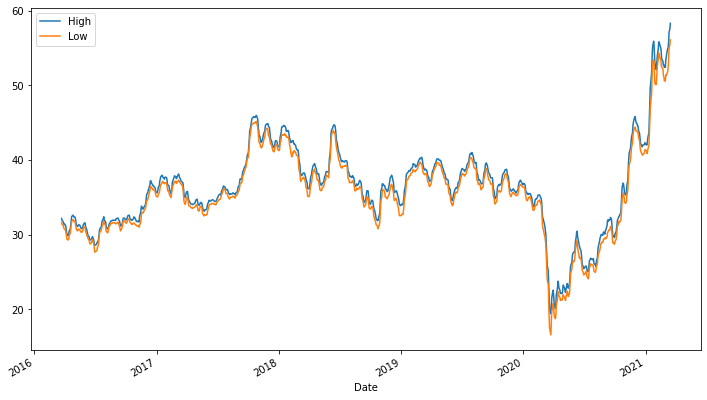

In [216]:
aapl.rolling(5)[['High', 'Low']].mean().plot();

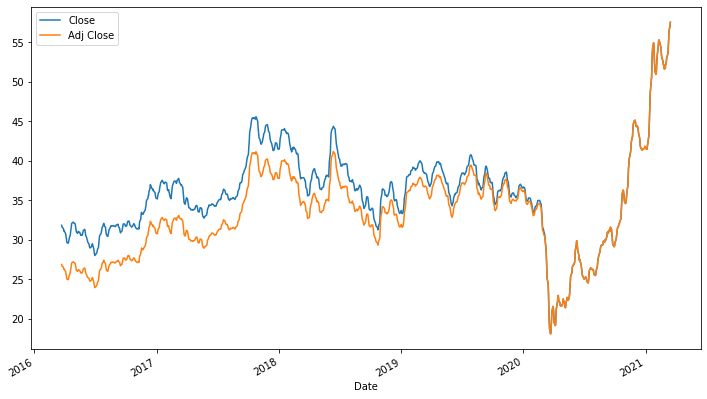

In [217]:

aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

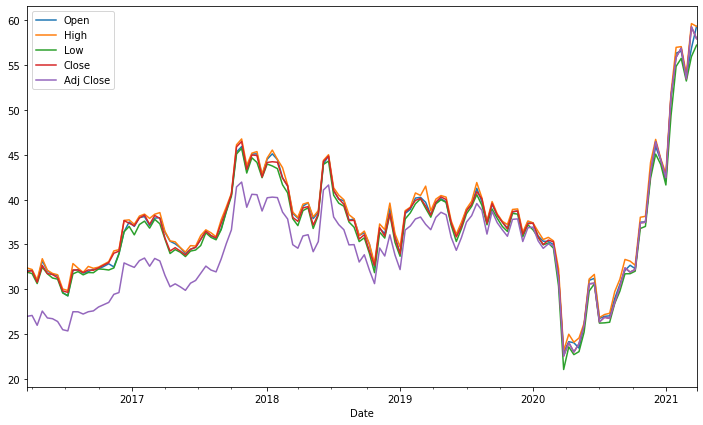

In [218]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

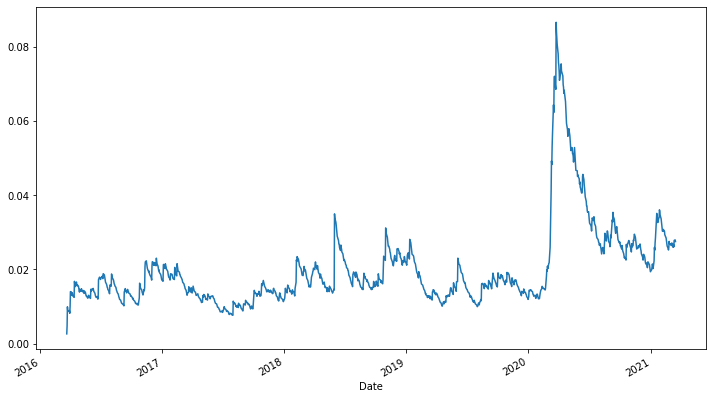

In [219]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

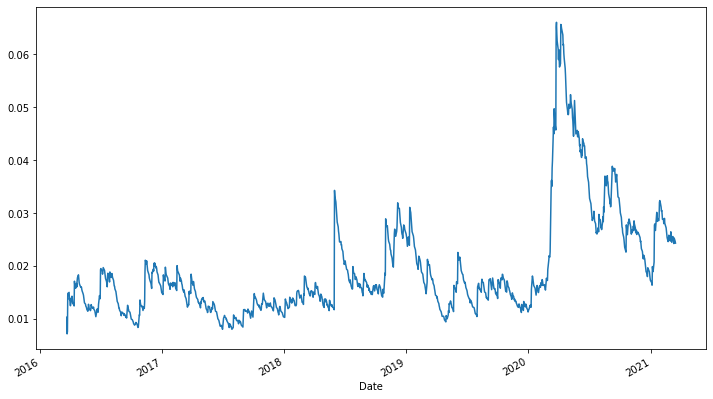

In [220]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['High'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [1]:

from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [2]:
from urllib.parse import urlencode 
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['VEGETABLES'], ## Change Fruit with Vegetables
  'commodity': ['TOMATOES'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'endDate': ['01/01/2021'], ## Hardcoding end Date
  'repDate': ['01/01/2020'], ## Hardcoding rep Date
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
tomatoes_data = pd.read_html('data.html', header=0)[0] 
## Be careful, this data is uncleaned, If you want to use it correctly, you will first have to clean it


## You now have data of tomatoes in the United States! Hurra!

In [20]:

tomatoes_data

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,212,1.81,NaN,NaN,NaN
1,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,NaN,NaN,per pound,46,3.34,NaN,NaN,NaN
2,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPE - HEIRLOOM VARIETIES,Y,NaN,per pound,23,3.99,NaN,NaN,NaN
3,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,NaN,NaN,per pound,2255,1.66,NaN,NaN,NaN
4,01/03/2020,NATIONAL,VEGETABLES,TOMATOES,VINE RIPES,Y,Greenhouse,per pound,245,1.48,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,VINE RIPES,NaN,Greenhouse,per pound,10,2.49,2.49,2.49,NaN
1919,01/01/2021,NORTHWEST U.S.,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,250,1.92,1.49,1.99,NaN
1920,01/01/2021,HAWAII,VEGETABLES,TOMATOES,NaN,NaN,NaN,per pound,4,2.29,2.29,2.29,NaN
1921,01/01/2021,ALASKA,VEGETABLES,TOMATOES,"VINE RIPES, ON THE VINE",NaN,Greenhouse,per pound,34,2.49,2.39,2.49,NaN


In [4]:

avocados = read_avocadata('2015', '2018')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2015-01-09 00:00:00+00:00,NATIONAL,HASS,False,8564,1.04,NaN,NaN
1,2015-01-09 00:00:00+00:00,NATIONAL,HASS,True,2428,1.32,NaN,NaN
2,2015-01-09 00:00:00+00:00,NATIONAL,GREENSKIN,False,660,1.08,NaN,NaN
3,2015-01-09 00:00:00+00:00,NORTHEAST,HASS,False,1933,1.32,0.98,2.0
4,2015-01-09 00:00:00+00:00,NORTHEAST,HASS,True,492,1.67,1.00,2.0


In [5]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

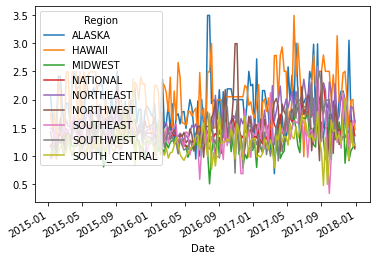

In [6]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [30]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

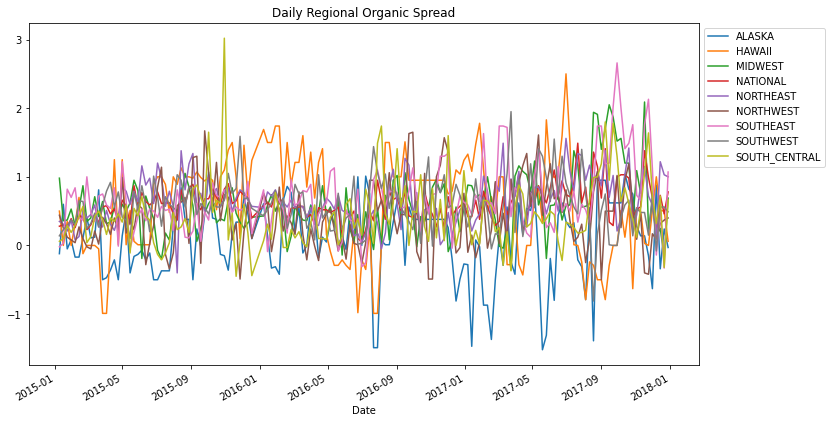

In [25]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [26]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,-0.011910,0.152325,-0.100104,-0.007537,0.081278,0.144806,-0.178786,0.114085
HAWAII,-0.011910,1.000000,-0.170334,0.013507,0.070092,0.141628,-0.137073,0.137550,-0.184017
MIDWEST,0.152325,-0.170334,1.000000,0.385558,0.199542,0.028828,0.347719,-0.224242,0.328485
NATIONAL,-0.100104,0.013507,0.385558,1.000000,0.574406,0.171291,0.331676,0.260559,0.301631
NORTHEAST,-0.007537,0.070092,0.199542,0.574406,1.000000,0.157721,0.083639,0.148029,0.043832
NORTHWEST,0.081278,0.141628,0.028828,0.171291,0.157721,1.000000,0.172606,0.102275,0.122854
SOUTHEAST,0.144806,-0.137073,0.347719,0.331676,0.083639,0.172606,1.000000,-0.087785,0.344116
SOUTHWEST,-0.178786,0.137550,-0.224242,0.260559,0.148029,0.102275,-0.087785,1.000000,-0.209116
SOUTH_CENTRAL,0.114085,-0.184017,0.328485,0.301631,0.043832,0.122854,0.344116,-0.209116,1.000000


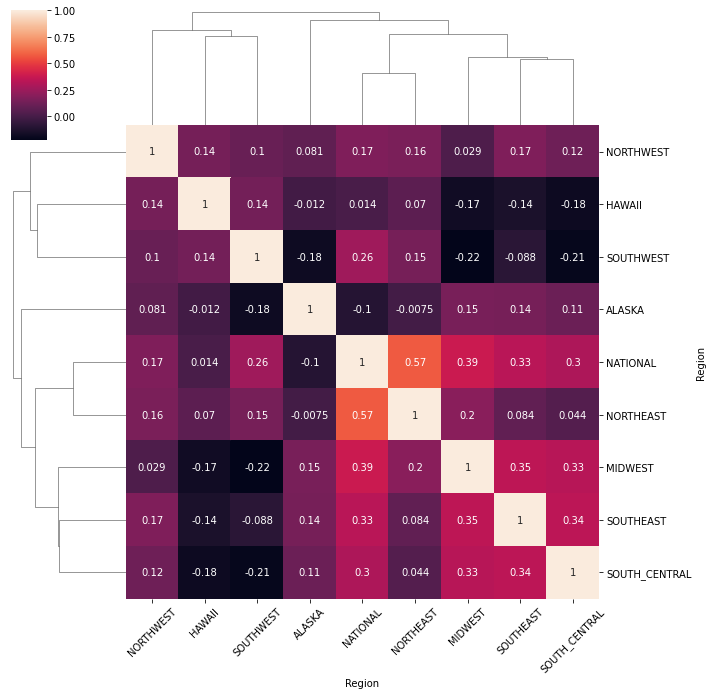

In [10]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

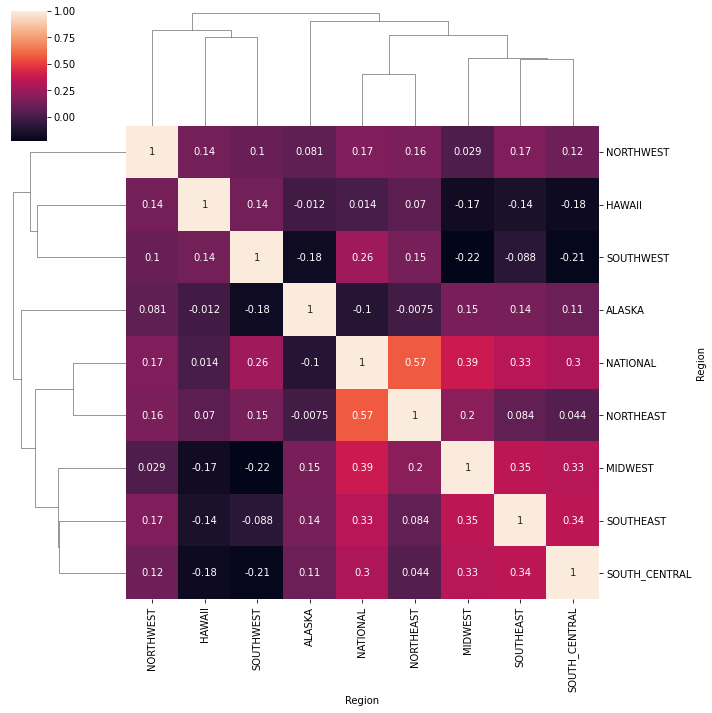

In [27]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[3]
ax.set_xticklabels(ax.get_xticklabels(), rotation=35);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!